In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
animals=pd.read_csv("horse.csv")

In [3]:
target=animals['outcome']

In [4]:
target.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [5]:
animals=animals.drop(['outcome'],axis=1)

In [6]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [7]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [8]:
category_variables=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse','mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux','rectal_exam_feces','abdomen', 'abdomo_appearance', 'surgical_lesion','cp_data']
animals.shape
for category in category_variables:
    animals[category]=pd.get_dummies(animals[category])


ValueError: Columns must be same length as key

In [ ]:
animals.surgery=pd.get_dummies(animals.surgery)

In [ ]:
animals.shape

In [ ]:
animals['surgery'].shape
animals['surgery']

In [ ]:
arr=pd.get_dummies(animals.surgery)
arr.shape
arr


In [ ]:
animals

In [9]:
from sklearn.preprocessing import LabelEncoder
category_variables=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse','mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux','rectal_exam_feces','abdomen', 'abdomo_appearance', 'surgical_lesion','cp_data']
animal_encoder=LabelEncoder()
for category in category_variables:
    animals[category]=animal_encoder.fit_transform(animals[category])
animals

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,6,2,...,0,45.0,8.4,3,NaN,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,4,4,4,1,...,4,50.0,85.0,1,2.0,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,3,33.0,6.7,3,NaN,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,5,48.0,7.2,2,5.3,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,4,4,2,2,...,5,74.0,7.4,3,NaN,0,4300,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,NaN,120.0,70.0,0,4,4,2,...,0,55.0,65.0,3,NaN,0,3205,0,0,0
295,0,0,527702,37.2,72.0,24.0,1,1,4,2,...,1,44.0,NaN,2,3.3,1,2208,0,0,1
296,1,0,529386,37.5,72.0,30.0,0,3,4,1,...,0,60.0,6.8,3,NaN,1,3205,0,0,0
297,1,0,530612,36.5,100.0,24.0,1,3,5,1,...,1,50.0,6.0,2,3.4,1,2208,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X,y=animals.values,target.values
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
#since we're dealing with decision trees we must be very careful with the missing data
from sklearn.impute import SimpleImputer
#Univariate imputer for completing missing values with simple strategies.
#Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
import numpy as np

imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X_train=imp.fit_transform(X_train)
X_test=imp.fit_transform(X_test)


In [22]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_predict=tree.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print('accuracy:',accuracy_score(y_predict,y_test))

accuracy: 0.6666666666666666


In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [25]:
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)
accuracy=accuracy_score(y_predict,y_test)
print(accuracy)

0.7166666666666667


In [26]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [27]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os as os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
export_graphviz(
        tree,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        feature_names=['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
        rounded=True,
        filled=True
    )

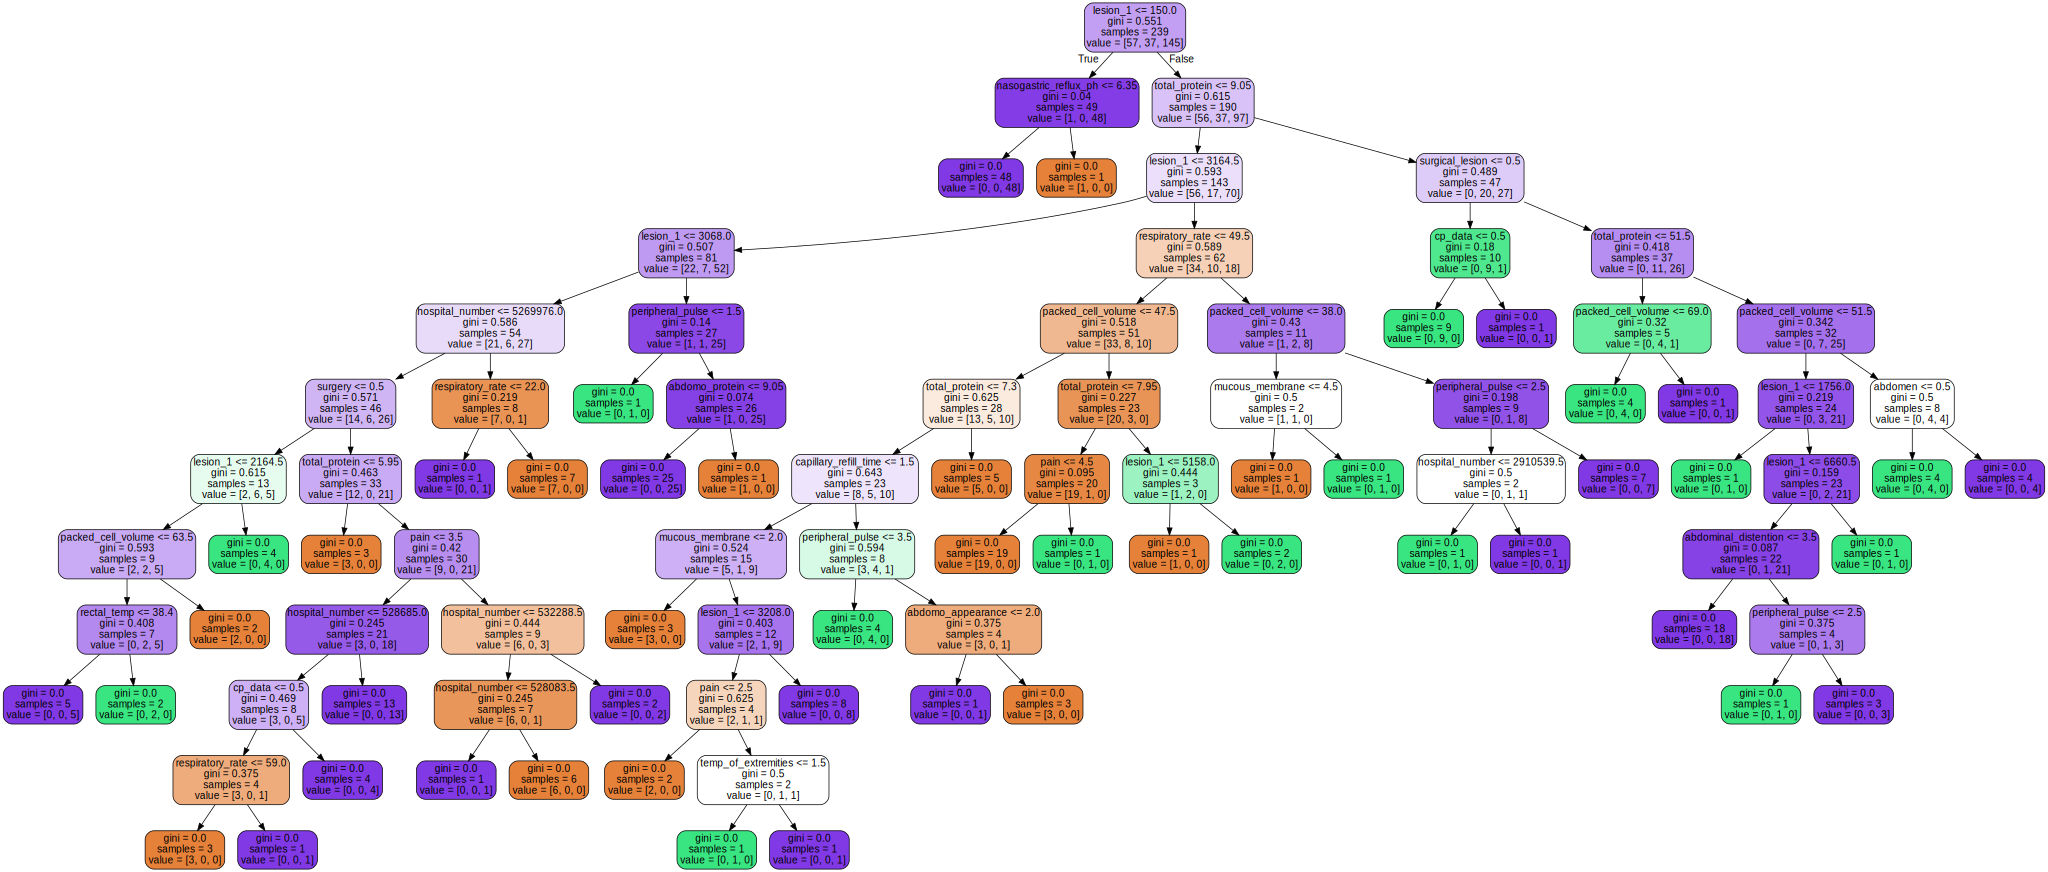

In [28]:
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))